## circle abstraction for chemical structure graphs
In this notebook I show how to use Graphlearn with abstract graphs to generate molecules with an abstraction 
that deals with circular motives.

### initialising

In [1]:
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
debug=True

configure_logging(logging.getLogger(),verbosity=1+debug)
%matplotlib inline

/home/ikea/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ikea/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### get_graphs will provide data( networkx graphs )

In [2]:
from eden.io.gspan import gspan_to_eden
from itertools import islice

def get_graphs(dataset_fname='../../toolsdata/bursi.pos.gspan', size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

## I demonstrate what an abstract graph looks like 


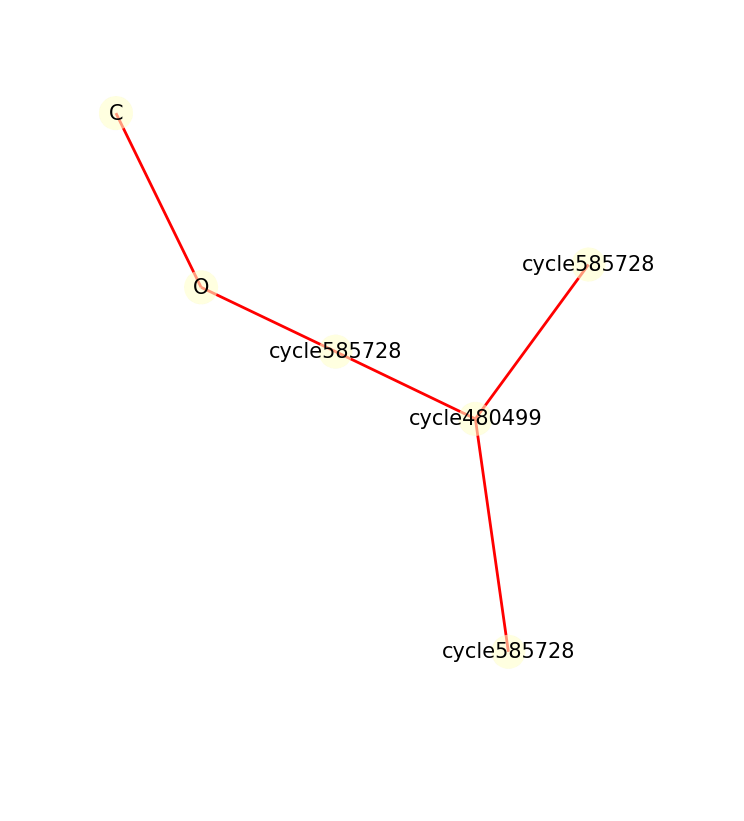

In [3]:
from graphlearn.utils import draw
import graphlearn.minor.molecule.transform_cycle as mole
import graphlearn.minor.decompose as decompose
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer
vectorizer=Vectorizer()

# get a graph and prepare it
graphs=get_graphs()
g=graphs.next()
g=vectorizer._graph_preprocessing(g)



# why do we need a decomposer? we dont do decomp here..
#decomposer = decompose.MinorDecomposer(                                            
#                       include_base=False,
#                       base_thickness_list=[2])




#the preprocessor makes the abstraction, wrapper provides convenient format for drawing

preproc=mole.GraphTransformerCircles()

#graph_wrapper = decomposer.make_new_decomposer(g)

#graph=graph_wrapper.pre_vectorizer_graph(nested=True)
graph= preproc.abstract(g)

# draw 
draw.graphlearn(graph,size=10, abstract_color='red', contract=True,ignore_for_layout='nesting')

## Here we see different views on a graph, provided by the wrapper,

for the sampling process CIPs need to be extracted. 
here we see this mechanism. 

DEMONSTRATING WRAPPER
grammar example 0
{'id': 't # id 1 target: 1\n'}


/home/ikea/.local/lib/python2.7/site-packages/pygraphviz/agraph.py:1338: RuntimeWarning: Warning: Max. iterations (5300) reached on graph %3

  warnings.warn(b"".join(errors), RuntimeWarning)


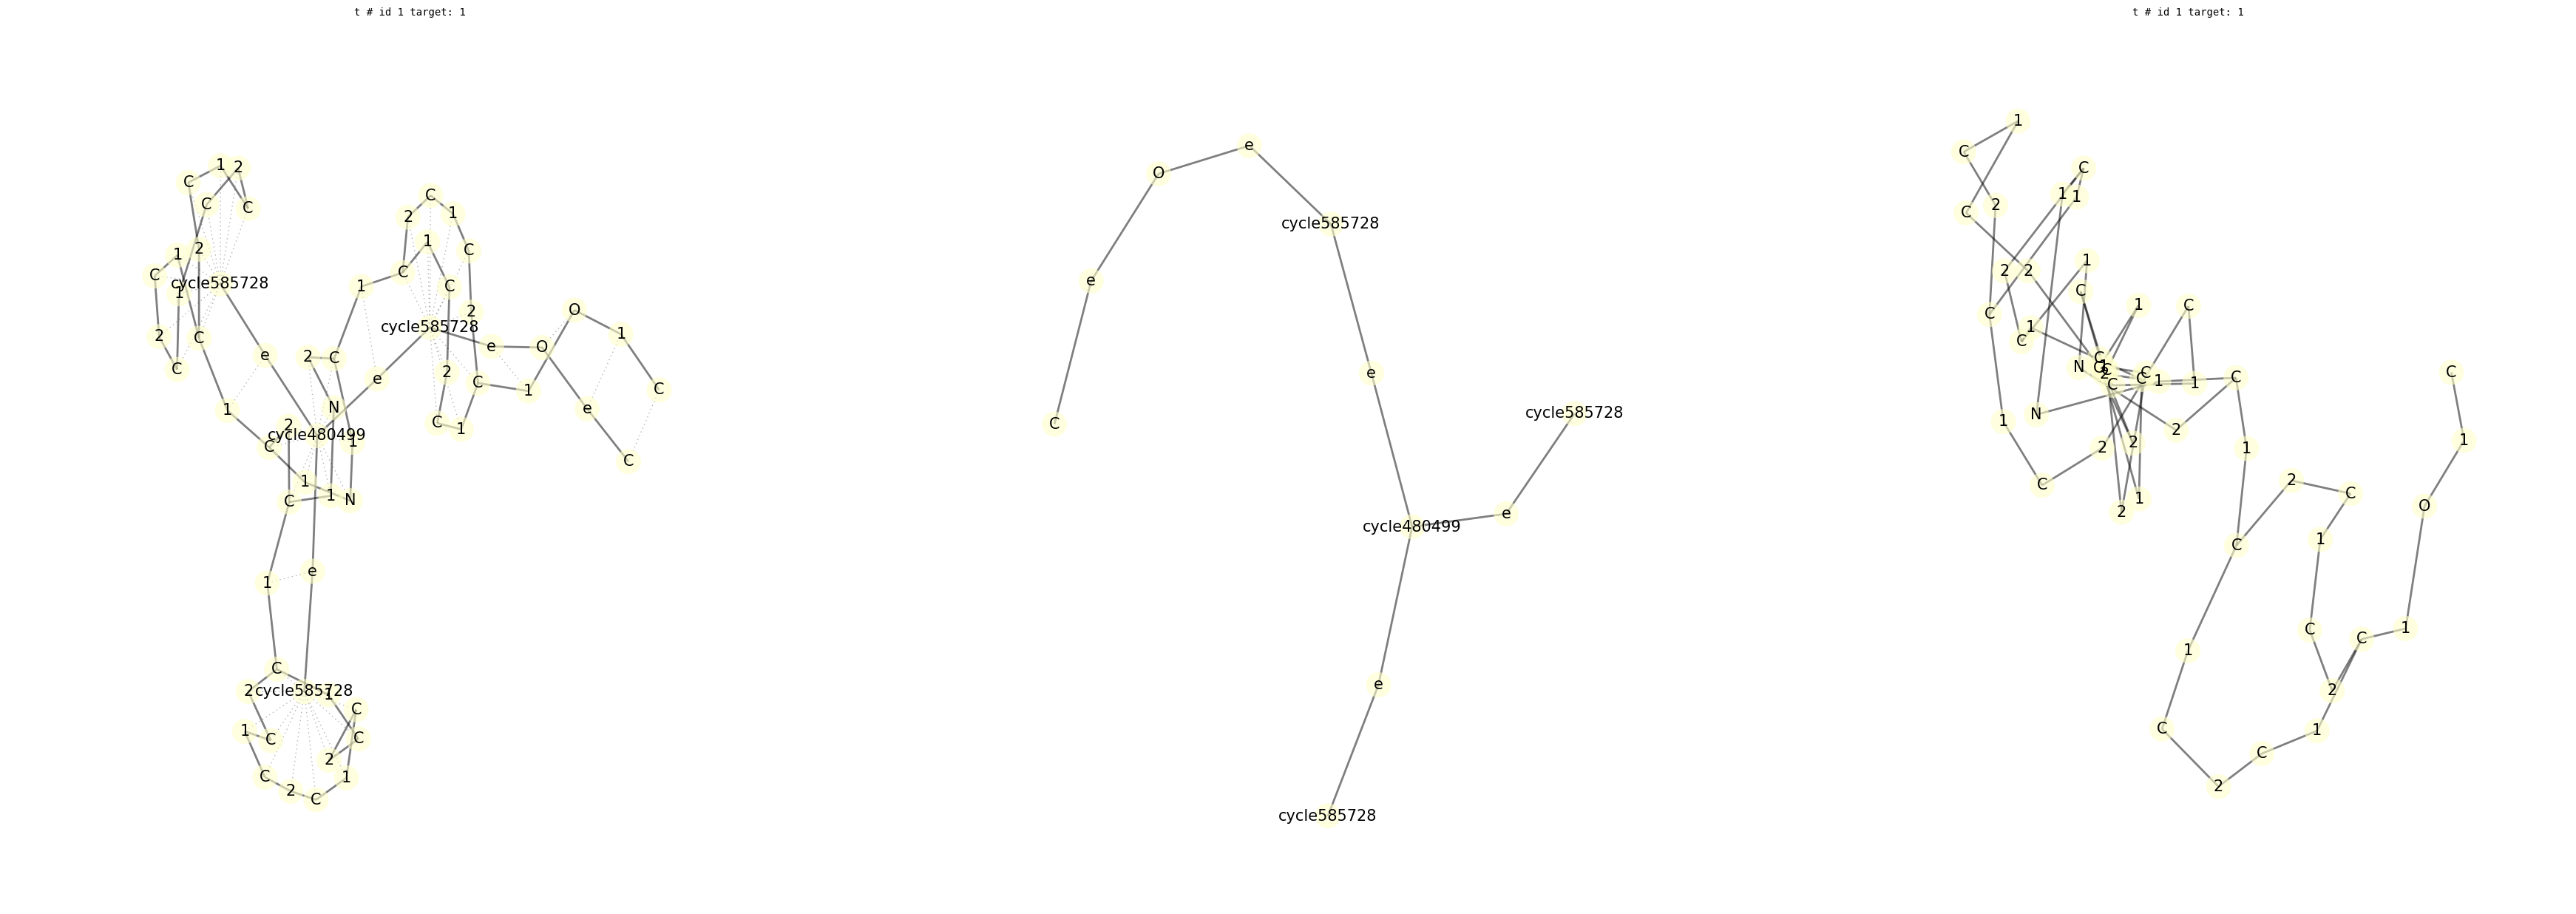

DEMONSTRATING EXTRACTION


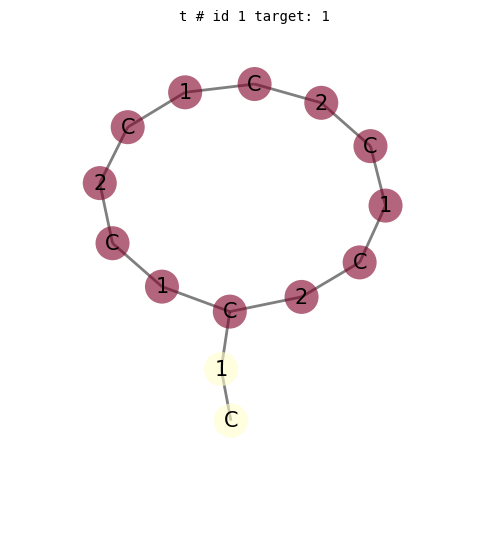

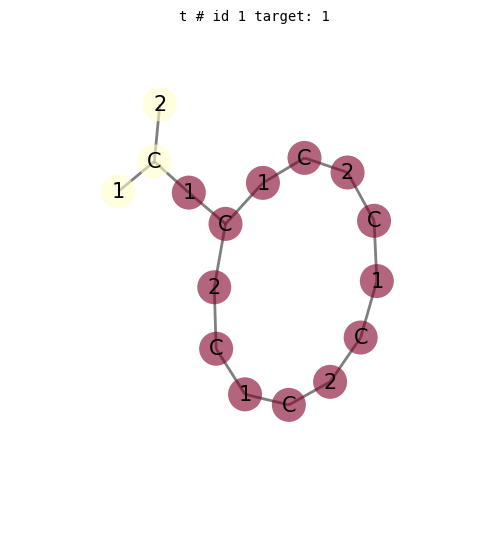

In [4]:
from graphlearn.utils import draw
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer


import graphlearn.minor.molecule.transform_cycle as mole
import graphlearn.minor.decompose as decompose



transformer=mole.GraphTransformerCircles()
decomposer = decompose.MinorDecomposer()


print 'DEMONSTRATING WRAPPER'
graphs=get_graphs()

for i in range(1):
    print 'grammar example %d' % i
    g=graphs.next()
    
    
    print g.graph
    gm=decomposer.make_new_decomposer( transformer.transform([g])[0])
    
    draw.graphlearn([gm.pre_vectorizer_graph(nested=True), gm.abstract_graph(),gm.base_graph()], 
                    size = 15,
                    vertex_label = 'label',
                    contract=False)

    
print 'DEMONSTRATING EXTRACTION'  
radius_list=[0,2]
thickness_list=[2,4]
base_thickness_list=[2]
argz=(gm,radius_list,thickness_list,Vectorizer(),2**20-1,lambda x,y:True, base_thickness_list)

cips=gm.all_core_interface_pairs(thickness_list=[2],radius_list=[0,1])
draw.graphlearn(cips[0][0].graph, contract=False)
draw.graphlearn(cips[0][1].graph, contract=False)

## here we prepare a sampler and then take a closer look at the generated grammar.


In [ ]:
%%time
from graphlearn.graphlearn import Sampler as GLS
graphs = get_graphs(size=200)
sampler=GLS(#radius_list=[0,1],
            #thickness_list=[1], 
            #min_cip_count=2, 
            #min_interface_count=2, 
            decomposer=decomposer,
            size_diff_core_filter= 4,
            graphtransformer=mole.GraphTransformerCircles())
sampler.fit(graphs)

accept_min_similarity: 0.0
accept_static_penalty: 0.0
batch_size: 10
    burnin: 0
core_choice_bytrial: False
core_choice_bytrial_multiplier: 1.0
decomposer: no graphs in decomposer
estimatorobject: <graphlearn.estimate.OneClassEstimator instance at 0x7f5b3d7c6950>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f5b3d7c6b48>
graph_transformer: <graphlearn.minor.molecule.transform_cycle.GraphTransformerCircles object at 0x7f5b3b3d36d0>
improving_linear_start_absolute: 0
improving_linear_start_fraction: 0
improving_penalty_per_step: 0.02
improving_threshold_absolute: 50
improving_threshold_fraction: -1
include_seed: False
keep_duplicates: False
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f5b3b767690>
maxbacktrack: 0
   monitor: False
  monitors: []
    n_jobs: 0
 n_samples: None
   n_steps: 50
orig_cip_max_positives: 1
orig_cip_min_positives: 0
orig_cip_score_tricks: False
probabilistic_core_choice: Tru

In [ ]:
#show congruent cips in grammar
draw.draw_grammar(sampler.lsgg.productions,n_productions=5,n_graphs_per_production=5,
                     n_graphs_per_line=5, size=9, contract=False,
                     colormap='Paired', invert_colormap=False,
                     vertex_alpha=0.6, edge_alpha=0.5,  abstract_interface=True)

interface id: 8188 [23 options]


## Molecule sampling

In [ ]:
%%time
import graphlearn.utils.draw as draw
import itertools

# parameters
graphs = get_graphs()
id_start=15
id_end=id_start+9
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=100


#sampling
graphs = sampler.transform(graphs)

 
scores=[]
ids=range(id_start,id_end)
for i,path_graphs in enumerate(graphs):
    # path_graphs is a list of 'sampled' graphs for 1 run 
    print 'Graph id: %d'%(ids[i])
    #save score
    scores.append(sampler.monitors[i].sampling_info['score_history'])
    # draw
    draw.graphlearn(path_graphs,
                           n_graphs_per_line=5, size=10, 
                           colormap='Paired', invert_colormap=False, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7,edge_label='label'  )

## show score history for each samplerun

In [ ]:
%matplotlib inline
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

---